# ONLINE SALES DATASET

Question :
1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Online Sales Data.csv")
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [10]:
missing_data = df.isnull()

for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")

Transaction ID
Transaction ID
False    240
Name: count, dtype: int64

Date
Date
False    240
Name: count, dtype: int64

Product Category
Product Category
False    240
Name: count, dtype: int64

Product Name
Product Name
False    240
Name: count, dtype: int64

Units Sold
Units Sold
False    240
Name: count, dtype: int64

Unit Price
Unit Price
False    240
Name: count, dtype: int64

Total Revenue
Total Revenue
False    240
Name: count, dtype: int64

Region
Region
False    240
Name: count, dtype: int64

Payment Method
Payment Method
False    240
Name: count, dtype: int64



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool

In [8]:
df['Month'] = df['Date'].astype(str).str[5:7]

In [10]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,01
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,01
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,01
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,01


#### 1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.

<function matplotlib.pyplot.show(close=None, block=None)>

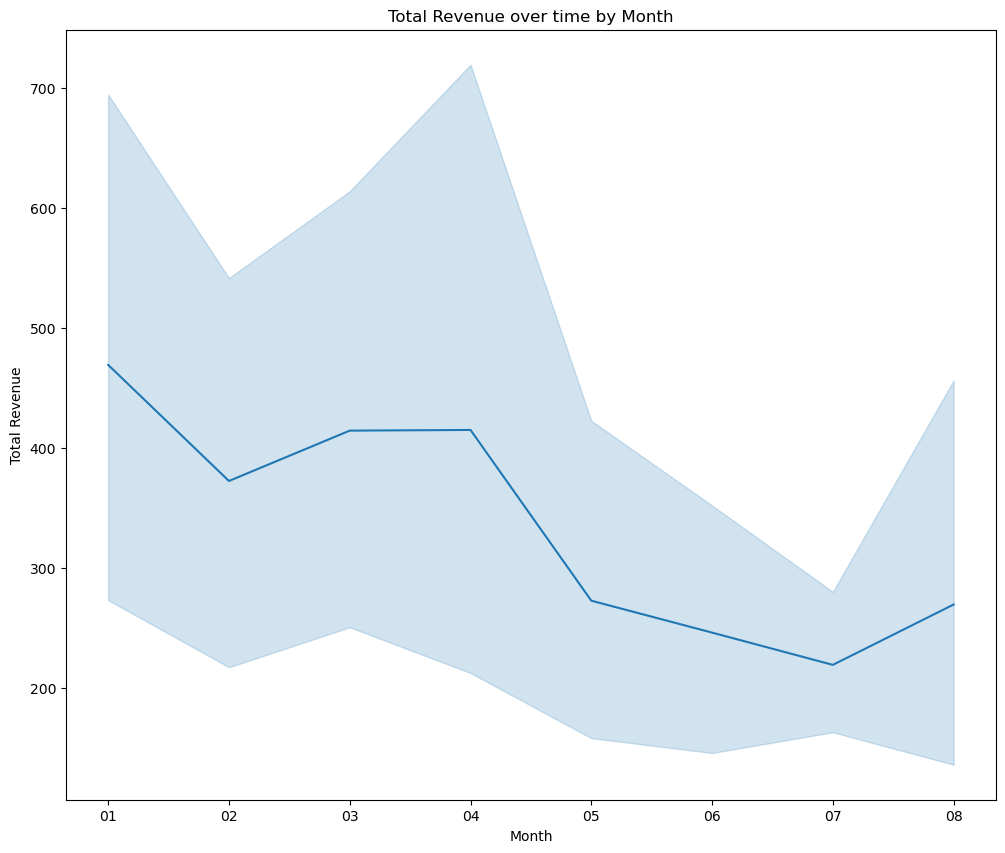

In [91]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Month', y='Total Revenue', data=df)
plt.title('Total Revenue over time by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

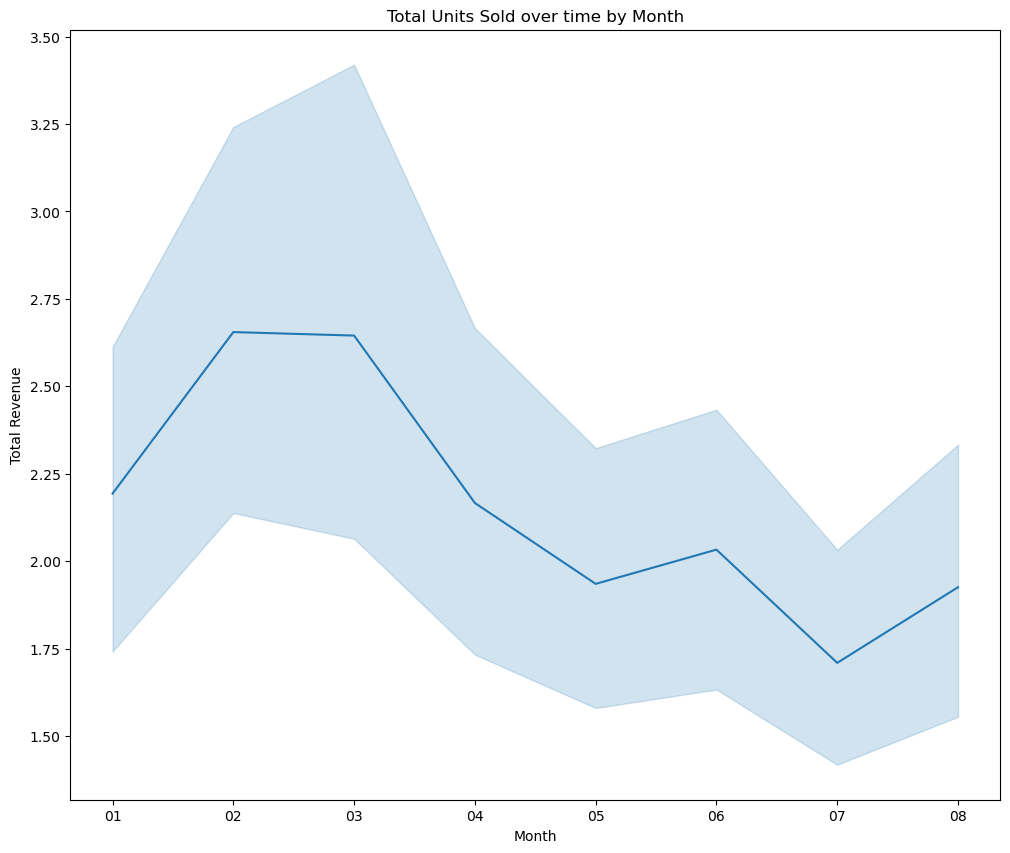

In [96]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Month', y='Units Sold', data=df)
plt.title('Total Units Sold over time by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show

#### 2. Explore the popularity of different product categories across regions

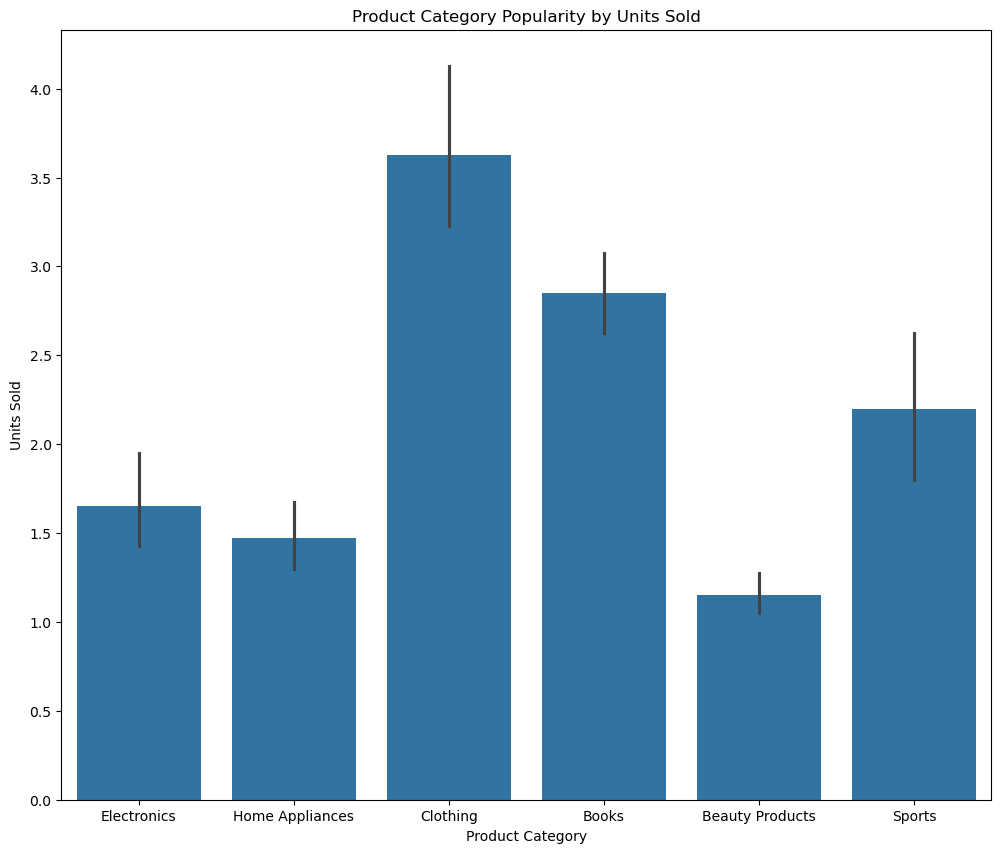

In [89]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.barplot(x='Product Category', y='Units Sold', data=df)
plt.title('Product Category Popularity by Units Sold')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

In [129]:
# Product Category popularity across Regions
df_group = df[['Product Category', 'Units Sold', 'Region']]
df_group = df_group.groupby(['Product Category', 'Region'], as_index=False).sum()
df_group

,Product Category,Region,Units Sold
0,Beauty Products,Europe,46
1,Books,North America,114
2,Clothing,Asia,145
3,Electronics,North America,66
4,Home Appliances,Europe,59
5,Sports,Asia,88


In [111]:
pd.set_option('display.max_rows', None)

#### 3. Investigate the impact of payment methods on sales volume or revenue.

In [135]:
df_group_2 = df[['Payment Method', 'Units Sold']]
df_group_2 = df_group_2.groupby(['Payment Method'], as_index = False).sum()
df_group_2

,Payment Method,Units Sold
0,Credit Card,268
1,Debit Card,145
2,PayPal,105


#### 4. Identify top-selling products within each category to optimize inventory and marketing strategies.

In [139]:
df_group_3 = df[['Product Category', 'Product Name', 'Units Sold']]
df_group_3 = df_group_3.groupby(['Product Category', 'Product Name'], as_index=False).sum()
df_group_3

,Product Category,Product Name,Units Sold
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,1
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,1
3,Beauty Products,CeraVe Hydrating Facial Cleanser,2
4,Beauty Products,Chanel No. 5 Perfume,1
5,Beauty Products,Charlotte Tilbury Magic Cream,1
6,Beauty Products,Clinique Dramatically Different Moisturizing L...,1
7,Beauty Products,Clinique Moisture Surge,1
8,Beauty Products,Dr. Jart+ Cicapair Tiger Grass Color Correctin...,1
9,Beauty Products,Drunk Elephant C-Firma Day Serum,1


In [144]:
df_group_3.sort_values(by=['Units Sold'], inplace=False, ascending=False)

,Product Category,Product Name,Units Sold
91,Clothing,Hanes ComfortSoft T-Shirt,10
52,Books,The Catcher in the Rye by J.D. Salinger,7
88,Clothing,Gap Essential Crewneck T-Shirt,6
98,Clothing,Nike Air Force 1,6
231,Sports,Yeti Rambler Tumbler,6
220,Sports,Spalding NBA Street Basketball,6
56,Books,The Girl with the Dragon Tattoo by Stieg Larsson,5
70,Books,The Silent Patient by Alex Michaelides,5
222,Sports,Titleist Pro V1 Golf Balls,5
225,Sports,Wilson Evolution Basketball,5


#### 5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

In [150]:
df_group_4 = df[['Product Name','Region', 'Total Revenue']]
df_group_4 = df_group_4.groupby(by=['Product Name', 'Region'], as_index=False).sum()
df_group_4.sort_values(by='Total Revenue', inplace=False, ascending=False)

,Product Name,Region,Total Revenue
39,Canon EOS R5 Camera,North America,3899.99
112,LG OLED TV,Europe,2599.98
125,MacBook Pro 16-inch,North America,2499.99
18,Apple MacBook Pro 16-inch,North America,2399.00
231,iPhone 14 Pro,North America,1999.98
152,Peloton Bike,Asia,1895.00
92,HP Spectre x360 Laptop,North America,1599.99
161,Roomba i7+,Europe,1599.98
166,Samsung Odyssey G9 Gaming Monitor,North America,1499.99
163,Samsung Galaxy Tab S8,North America,1499.98


In [152]:
df_group_5 = df[['Product Category','Region', 'Total Revenue']]
df_group_5 = df_group_5.groupby(by=['Product Category', 'Region'], as_index=False).sum()
df_group_5.sort_values(by='Total Revenue', inplace=False, ascending=False)

,Product Category,Region,Total Revenue
3,Electronics,North America,34982.41
4,Home Appliances,Europe,18646.16
5,Sports,Asia,14326.52
2,Clothing,Asia,8128.93
0,Beauty Products,Europe,2621.90
1,Books,North America,1861.93


In [6]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000
